Segmentation
=======

In [1]:
%matplotlib inline

import cv2
import numpy as np
from matplotlib import pyplot as plt

from skimage import data, segmentation, color
from skimage.future import graph

Original image
----------------

(800, 600, 3)

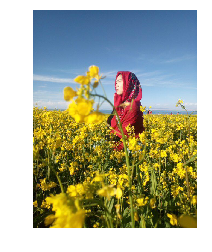

In [2]:
img = plt.imread('/home/jwu/Downloads/840298368.jpg')
plt.imshow(img)
plt.axis('off')

img.shape

Segmentation based on Mean shift
-----------------------------------

The kernel for segmentation
$$K_{h_s, h_r}(\mathbf{x}) = \frac{C}{{h^2_s} {h^p_r}}k(\|\frac{\mathbf{x}^s}{h_s}\|^2)k(\|\frac{\mathbf{x}^r}{h_r}\|^2)$$

In [3]:
def convert_img_vec(img_rgb):
    vecs = []
    img_Luv = cv2.cvtColor(img, cv2.COLOR_RGB2Luv)
    
    for x in range(img_Luv.shape[0]):
        for y in range(img_Luv.shape[1]):
            vecs.append(np.append([x, y], img_Luv[x, y, :]))
            
    return vecs

In [4]:
a = convert_img_vec(img)

In [5]:
a[:10]

[array([ 0,  0, 95, 86, 97]),
 array([ 0,  1, 97, 86, 97]),
 array([ 0,  2, 99, 86, 97]),
 array([  0,   3, 100,  85,  97]),
 array([  0,   4, 100,  85,  97]),
 array([ 0,  5, 99, 86, 97]),
 array([ 0,  6, 97, 86, 97]),
 array([ 0,  7, 95, 86, 97]),
 array([ 0,  8, 98, 86, 97]),
 array([ 0,  9, 98, 86, 97])]

In [6]:
from mean_shift.mean_shift_utils import segmentation_kernel
from mean_shift.mean_shift import mean_shift as ms
from mean_shift.mean_shift_utils import euclid_distance

ms = ms(kernel = segmentation_kernel)

In [9]:
r = ms.cluster(points=a, kernel_bandwidth=(8, 16))
r

KeyboardInterrupt: 

Segmentation based on Normalized Cut
----------------------------------------

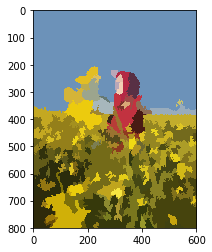

In [16]:
labels1 = segmentation.slic(img, compactness=30, n_segments=800)
g = graph.rag_mean_color(img, labels1, mode='similarity')
labels2 = graph.cut_normalized(labels1, g)
out = color.label2rgb(labels2, img, kind='avg')
plt.imshow(out)

In [19]:
plt.imsave('/home/jwu/Desktop/o.png', out)